In [48]:
import numpy as np
import pandas as pd
from scipy import stats
 
# グラフ描画
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline

In [49]:
df1 = pd.read_csv('prepared.csv')
df1.head(5)

,btcbegin,btchigh,btclow,btcend,cboebegin,cboehigh,cboelow,cboeend,cboevolumn,3hbefore,12hbefore,1dbefore,2dbefore,3hafter,12hafter,1dafter,2dafter
0,0.841661,0.852194,0.852028,0.847339,0.881466,0.855938,0.889861,0.892185,0.001399,1,0,0,0,1,0,0,0
1,0.847584,0.849842,0.850851,0.834259,0.881466,0.862966,0.889861,0.899421,0.002797,1,0,0,0,0,0,0,0
2,0.834259,0.851696,0.859213,0.856183,0.892960,0.861560,0.901334,0.897974,0.001399,1,0,0,0,0,0,0,0
3,0.856183,0.846330,0.847294,0.830488,0.881466,0.848911,0.879105,0.874096,0.002797,0,0,0,0,0,0,0,0
4,0.830488,0.831418,0.800146,0.792579,0.870690,0.838370,0.864764,0.859624,0.002797,1,1,0,0,0,1,0,0


In [51]:
from sklearn import svm

In [52]:
dftmp = df1.drop(['3hafter','12hafter','1dafter','2dafter'],axis=1)
X_factors = dftmp.as_matrix()
type(X_factors)
X_factors.shape

(1124, 13)

In [53]:
y_target = df1['3hafter'].values
y_target.shape

(1124,)

In [54]:
svc = svm.SVC(C=1, kernel='linear')
svc.fit(X_factors[:-100], y_target[:-100]).score(X_factors[-100:], y_target[-100:])

0.52

In [55]:
svc.predict(X_factors[1099:1104])

array([1, 1, 0, 1, 1])

In [56]:
svc.coef_

array([[-4.05936874, -1.20166947, -0.85174787,  1.66264826, -1.02034796,
         1.03646756,  1.59671808,  2.88548374, -0.43142579,  0.26334153,
         1.53691394, -0.15119274, -0.010138  ]])

In [57]:
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(max_depth=5) 
dectree.fit(X_factors[:-100], y_target[:-100]).score(X_factors[-100:], y_target[-100:])

0.53

In [58]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=1) 
mlp.fit(X_factors[:-100], y_target[:-100]).score(X_factors[-100:], y_target[-100:])

0.54

In [59]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

forest =  RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
forest.fit(X_factors[:-100], y_target[:-100]).score(X_factors[-100:], y_target[-100:])

0.51

In [61]:
y_target_1d = df1['1dafter'].values
y_target_1d.shape

(1124,)

In [62]:
svc.fit(X_factors[:-100], y_target_1d[:-100]).score(X_factors[-100:], y_target_1d[-100:])

0.31

In [63]:
forest.fit(X_factors[:-100], y_target_1d[:-100]).score(X_factors[-100:], y_target_1d[-100:])

0.37

In [64]:
mlp.fit(X_factors[:-100], y_target_1d[:-100]).score(X_factors[-100:], y_target_1d[-100:])

0.39

In [65]:
dectree.fit(X_factors[:-100], y_target_1d[:-100]).score(X_factors[-100:], y_target_1d[-100:])

0.31

In [66]:
from sklearn.model_selection import KFold, cross_val_score

k_fold = KFold(n_splits=3)
[svc.fit(X_factors[train], y_target[train]).score(X_factors[test], y_target[test]) for train, test in k_fold.split(X_factors)]

[0.5466666666666666, 0.552, 0.5026737967914439]

In [67]:
from sklearn.model_selection import GridSearchCV, cross_val_score
Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs),n_jobs=-1)
clf.fit(X_factors[:800], y_target[:800])   

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.00000e-06, 3.59381e-06, 1.29155e-05, 4.64159e-05, 1.66810e-04,
       5.99484e-04, 2.15443e-03, 7.74264e-03, 2.78256e-02, 1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [68]:
clf.best_estimator_.C

0.1

In [69]:
cross_val_score(clf, X_factors, y_target)

array([0.504     , 0.53866667, 0.49465241])

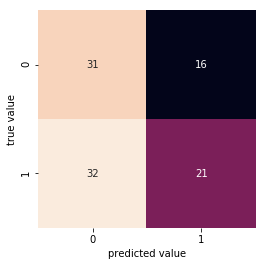

In [76]:
from sklearn.metrics import confusion_matrix

y_model = svc.predict(X_factors[-100:])
mat = confusion_matrix(y_target[-100:], y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [77]:
from sklearn.metrics import roc_curve

svc_f, svc_p, _ = roc_curve(y_target[-100:], y_model)

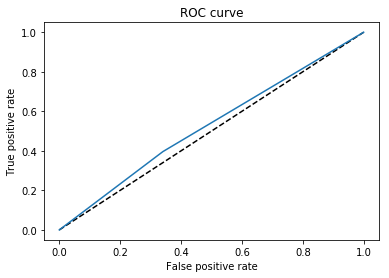

In [80]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(svc_f, svc_p, label='RT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()